# Loading data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [31]:
df = pd.read_excel('vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.head()



,Years,Sales,Unnamed: 2
0,2001-01-01,139.7,NaN
1,2001-02-01,114.3,NaN
2,2001-03-01,101.6,NaN
3,2001-04-01,152.4,NaN
4,2001-05-01,215.9,NaN


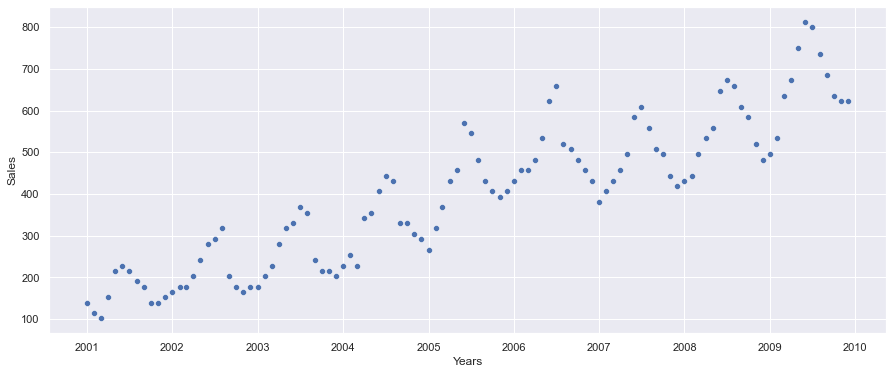

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Years",y="Sales",data=df)
plt.show()

In [33]:
df = pd.DataFrame(df)
df

,Years,Sales,Unnamed: 2
0,2001-01-01,139.7,NaN
1,2001-02-01,114.3,NaN
2,2001-03-01,101.6,NaN
3,2001-04-01,152.4,NaN
4,2001-05-01,215.9,NaN
...,...,...,...
103,2009-08-01,736.6,NaN
104,2009-09-01,685.5,NaN
105,2009-10-01,635.0,NaN
106,2009-11-01,622.3,NaN


In [34]:
pd.to_datetime(df['Years'] ,format = '%Y-%m-%d')

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
103   2009-08-01
104   2009-09-01
105   2009-10-01
106   2009-11-01
107   2009-12-01
Name: Years, Length: 108, dtype: datetime64[ns]

In [35]:
df['y'] = df['Years'].dt.year 
df['m'] = df['Years'].dt.month
df['q'] = df['Years'].dt.quarter 


In [36]:
df.groupby(by = ['y','q']).sum()

Sales  Unnamed: 2   m
y    q                        
2001 1   355.6         0.0   6
     2   596.9         0.0  15
     3   584.2         0.0  24
     4   431.8         0.0  33
2002 1   520.7         0.0   6
     2   723.6         0.0  15
     3   812.8         0.0  24
     4   520.7         0.0  33
2003 1   609.6         0.0   6
     2   927.1         0.0  15
     3   965.2         0.0  24
     4   635.0         0.0  33
2004 1   709.3         0.0   6
     2  1104.9         0.0  15
     3  1206.5         0.0  24
     4   927.1         0.0  33
2005 1   952.5         0.0   6
     2  1460.5         0.0  15
     3  1460.5         0.0  24
     4  1206.5         0.0  33
2006 1  1346.2         0.0   6
     2  1638.3         0.0  15
     3  1689.1         0.0  24
     4  1371.6         0.0  33
2007 1  1219.2         0.0   6
     2  1536.7         0.0  15
     3  1676.4         0.0  24
     4  1358.9         0.0  33
2008 1  1371.6         0.0   6
     2  1739.9         0.0  15
     3  1943.1         0.0  24
     4  1587.5         0.0  33
2009 1  1663.7         0.0   6
     2  2235.2         0.0  15
     3  2222.2         0.0  24
     4  1879.6         0.0  33

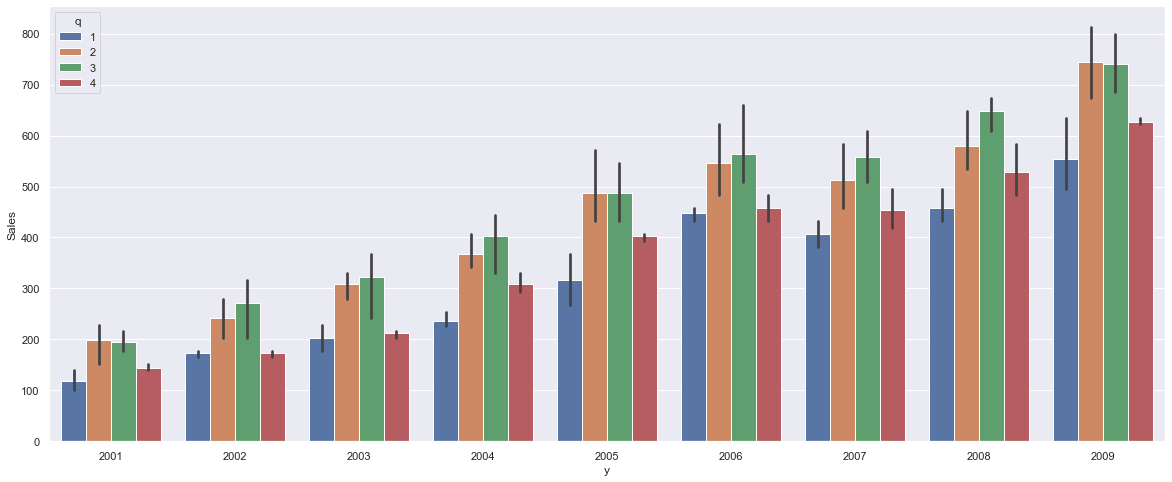

In [37]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.barplot(data = df, x = "y" , y = "Sales" , hue = 'q')
plt.show()


In [38]:
df['time'] = np.arange(1,109,1)

In [39]:
df.head()

,Years,Sales,Unnamed: 2,y,m,q,time
0,2001-01-01,139.7,NaN,2001,1,1,1
1,2001-02-01,114.3,NaN,2001,2,1,2
2,2001-03-01,101.6,NaN,2001,3,1,3
3,2001-04-01,152.4,NaN,2001,4,2,4
4,2001-05-01,215.9,NaN,2001,5,2,5


In [40]:
df_train = df.loc[:81]
df_test = df.loc[81:]

In [41]:
df_train.tail()
df_test.head()

,Years,Sales,Unnamed: 2,y,m,q,time
81,2007-10-01,495.3,NaN,2007,10,4,82
82,2007-11-01,444.5,NaN,2007,11,4,83
83,2007-12-01,419.1,NaN,2007,12,4,84
84,2008-01-01,431.8,NaN,2008,1,1,85
85,2008-02-01,444.5,NaN,2008,2,1,86


In [42]:
x_train = df_train[["time"]].values
y_train = df_train[["Sales"]].values


In [43]:
x_test = df_test[["time"]].values
y_test = df_test[["Sales"]].values

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
model_trend = LinearRegression()


In [46]:
model_trend.fit(x_train , y_train)

LinearRegression()

In [47]:
model_trend = LinearRegression()
model_trend.fit(x_train , y_train)
y_fitted_values = model_trend.predict(x_train)
y_predicted_values = model_trend.predict(x_test)

In [48]:
error = y_train - y_fitted_values
std_error = error.std()

In [49]:

interval = 4,4 * std_error

In [50]:


interval

(4, 266.7335092327928)

ValueError: 'y1' is not 1-dimensional

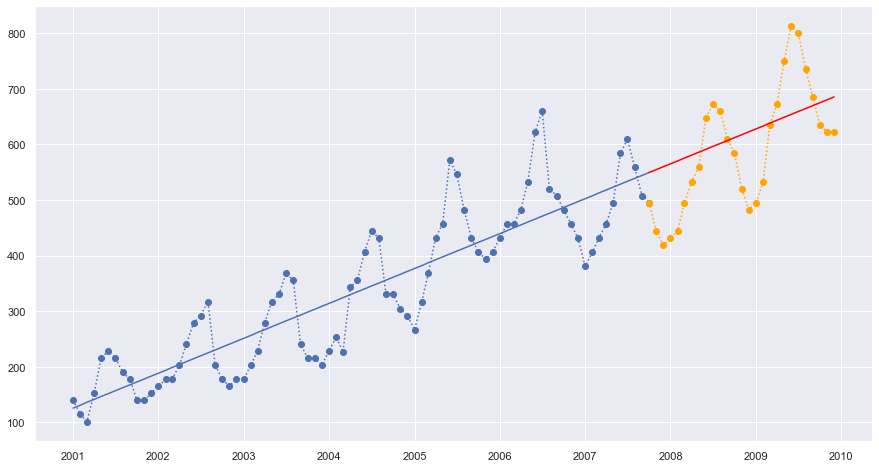

In [51]:
plt.figure(figsize=(15,8))
#train base
plt.plot(df_train["Years"],y_train, "bo:")
plt.plot(df_train["Years"],y_fitted_values)
plt.plot(df_test["Years"],y_test, "o:",color='orange')
plt.plot(df_test["Years"],y_predicted_values , color='red')

marge_min = y_predicted_values - interval
marge_max = y_predicted_values + interval
plt.fill_between(df_test["Years"], marge_max ,marge_min , alpha = 0.1 , color='black')

plt.show()

In [52]:
df.head()

,Years,Sales,Unnamed: 2,y,m,q,time
0,2001-01-01,139.7,NaN,2001,1,1,1
1,2001-02-01,114.3,NaN,2001,2,1,2
2,2001-03-01,101.6,NaN,2001,3,1,3
3,2001-04-01,152.4,NaN,2001,4,2,4
4,2001-05-01,215.9,NaN,2001,5,2,5


In [53]:
df_One_Hot_Encoding_train = df_train.copy()
df_One_Hot_Encoding_test = df_test.copy()

In [54]:
df_One_Hot_Encoding_train['month_name'] = pd.to_datetime(df_One_Hot_Encoding_train['m'], format='%m').dt.month_name()
df_One_Hot_Encoding_test['month_name'] = pd.to_datetime(df_One_Hot_Encoding_test['m'], format='%m').dt.month_name()

In [55]:
df_One_Hot_Encoding_train = df_One_Hot_Encoding_train.drop(['y','q'], axis = 1)
df_One_Hot_Encoding_test = df_One_Hot_Encoding_test.drop(['y','q'], axis = 1)

In [63]:
df_One_Hot_Encoding_train.head()
df_One_Hot_Encoding_train.head()

,Years,Sales,Unnamed: 2,m,time,month_name
0,2001-01-01,139.7,NaN,1,1,January
1,2001-02-01,114.3,NaN,2,2,February
2,2001-03-01,101.6,NaN,3,3,March
3,2001-04-01,152.4,NaN,4,4,April
4,2001-05-01,215.9,NaN,5,5,May


In [56]:
OHE_train = pd.get_dummies(df_One_Hot_Encoding_train["month_name"])
OHE_test = pd.get_dummies(df_One_Hot_Encoding_test['month_name'])

In [57]:
OHE_train.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


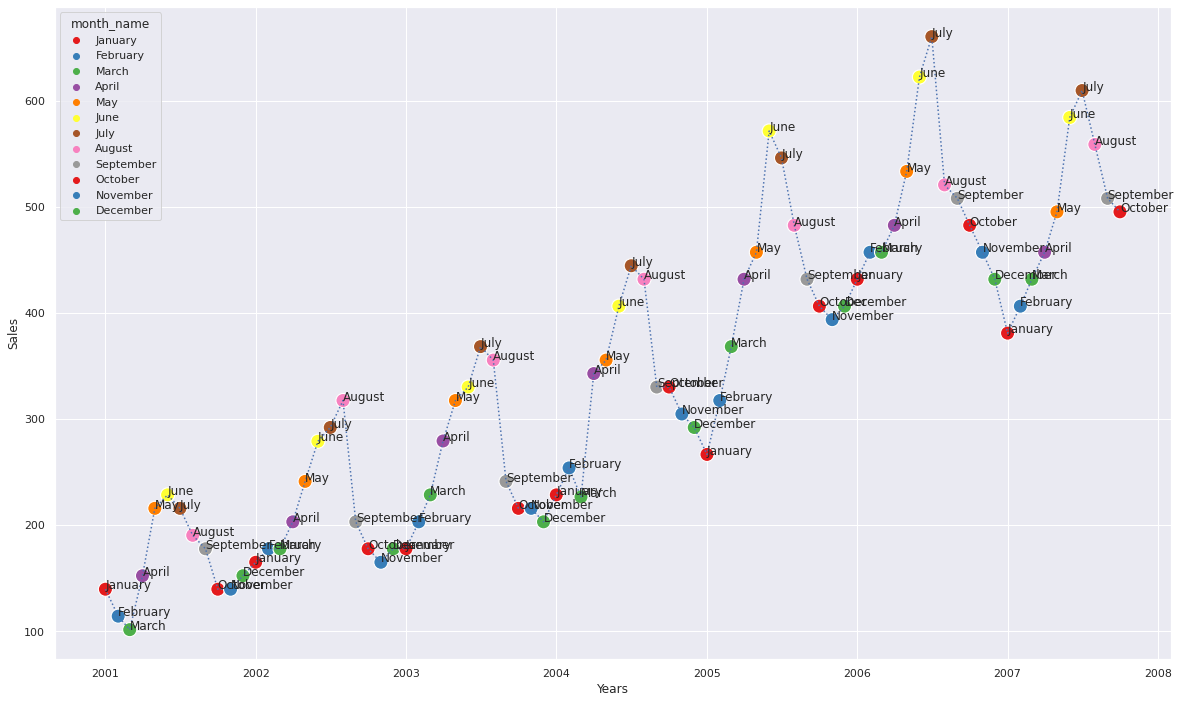

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(df_train["Years"],df_train["Sales"],"b:")
sns.scatterplot("Years","Sales",data = df_One_Hot_Encoding_train, s = 200 , hue = "month_name",palette="Set1" )

for index_line in range(len(df_One_Hot_Encoding_train)):
  plt.text(df_One_Hot_Encoding_train['Years'][index_line],df_One_Hot_Encoding_train['Sales'][index_line], df_One_Hot_Encoding_train['month_name'][index_line])

In [58]:
OHE_train.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
df_One_Hot_Encoding_train = pd.concat((df_One_Hot_Encoding_train , df_OHE_train),axis = 1)
df_One_Hot_Encoding_test = pd.concat((df_One_Hot_Encoding_test , df_OHE_test),axis = 1)

NameError: name 'df_OHE_train' is not defined

In [60]:
df_One_Hot_Encoding_train.head()

,Years,Sales,Unnamed: 2,m,time,month_name
0,2001-01-01,139.7,NaN,1,1,January
1,2001-02-01,114.3,NaN,2,2,February
2,2001-03-01,101.6,NaN,3,3,March
3,2001-04-01,152.4,NaN,4,4,April
4,2001-05-01,215.9,NaN,5,5,May


In [61]:
columns_for_regression = ["April" , "August" , "December" , "February" , "January" , "July" , "June" , "March" , "May" , "November" , "October" , "September" , "time"]
x_train_add = df_One_Hot_Encoding_train[columns_for_regression].values
y_train_add = df_One_Hot_Encoding_train["Sales"].values

x_test_add = df_One_Hot_Encoding_test[columns_for_regression].values
y_test_add = df_One_Hot_Encoding_test["Sales"].values

KeyError: "['December', 'August', 'January', 'April', 'June', 'September', 'March', 'November', 'May', 'February', 'July', 'October'] not in index"

In [62]:
#from sklearn.linear_model import LinearRegression

In [66]:
model_add = LinearRegression()
model_add.fit(x_train_add,y_train_add)

NameError: name 'x_train_add' is not defined

In [67]:
y_fitted_values_add = model_add.predict(x_train_add)
y_predicted_values_add = model_add.predict(x_test_add)

NameError: name 'x_train_add' is not defined

In [68]:
error_add = y_test_add - y_predicted_values_add
std_error_add = error_add.std()
interval = 4.4*std_error_add

NameError: name 'y_test_add' is not defined

In [69]:
marge_max = y_predicted_values_add + interval
marge_min = y_predicted_values_add - interval

NameError: name 'y_predicted_values_add' is not defined

In [70]:
plt.figure(figsize=(30,15))
#train base
plt.plot(df_One_Hot_Encoding_train["Years"],y_train_add, "bo:")
plt.plot(df_One_Hot_Encoding_train["Years"],y_fitted_values_add)
plt.plot(df_One_Hot_Encoding_test["Years"],y_test_add, "o:",color='orange')
plt.plot(df_One_Hot_Encoding_test["Years"],y_predicted_values_add , color='red')

marge_max = y_predicted_values_add + interval
marge_min = y_predicted_values_add - interval
plt.fill_between(df_One_Hot_Encoding_test["Years"], marge_max ,marge_min , alpha = 0.1 , color='black')

for index_line in range(len(df_One_Hot_Encoding_train)):

  if df_One_Hot_Encoding_train["month_name"][index_line] in ['May','June','July','August']:
    plt.text(df_One_Hot_Encoding_train['Years'][index_line],df_One_Hot_Encoding_train['Sales'][index_line], df_One_Hot_Encoding_train['month_name'][index_line])


plt.grid(lw = 0.2,color = "black")
plt.legend(["Données d'entrainement" , "Fitted values mod.additif donnée d'entrainement" , "Données de test" , "Prediction par le modèle aadditif" , "Interval de confiance à 95%"],loc = 2,prop={'size':20})
plt.show()

NameError: name 'y_train_add' is not defined

<Figure size 2160x1080 with 0 Axes>

In [71]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [72]:
df_train2['month_name'] = pd.to_datetime(df_train2['m'], format='%m').dt.month_name()
df_test2['month_name'] = pd.to_datetime(df_test2['m'], format='%m').dt.month_name()

In [73]:

x_train2 = df_train2[["time"]].values
y_train2 = df_train2[["Sales"]].values
x_test2 = df_test2[["time"]].values
y_test2 = df_test2[["Sales"]].values

model_trend_2 = LinearRegression()
model_trend_2.fit(x_train2 , y_train2)

y_fitted_values_2 = model_trend_2.predict(x_train2)
y_predicted_values_2 = model_trend_2.predict(x_test2)







In [74]:

facteur_correctif_train = y_train2/y_fitted_values_2
facteur_correctif_test = y_test2/y_predicted_values_2



In [75]:
df_train2['trend_prediction'] = y_fitted_values_2
df_test2['trend_prediction'] = y_predicted_values_2

df_train2['FC'] = facteur_correctif_train
df_test2['FC'] = facteur_correctif_test

In [76]:
df_train2

,Years,Sales,Unnamed: 2,y,m,q,time,month_name,trend_prediction,FC
0,2001-01-01,139.7,NaN,2001,1,1,1,January,125.723744,1.111166
1,2001-02-01,114.3,NaN,2001,2,1,2,February,130.955437,0.872816
2,2001-03-01,101.6,NaN,2001,3,1,3,March,136.187130,0.746032
3,2001-04-01,152.4,NaN,2001,4,2,4,April,141.418823,1.077650
4,2001-05-01,215.9,NaN,2001,5,2,5,May,146.650516,1.472208
...,...,...,...,...,...,...,...,...,...,...
77,2007-06-01,584.2,NaN,2007,6,2,78,June,528.564118,1.105259
78,2007-07-01,609.6,NaN,2007,7,3,79,July,533.795811,1.142010
79,2007-08-01,558.8,NaN,2007,8,3,80,August,539.027504,1.036682
80,2007-09-01,508.0,NaN,2007,9,3,81,September,544.259197,0.933379


In [77]:
df_train2_mean = df_train2[['FC','month_name']].groupby('month_name').mean().rename(columns={"FC" : "FCM"})
df_test2_mean = df_test2[['FC','month_name']].groupby('month_name').mean().rename(columns={"FC" : "FCM"})
df_train2_mean.reset_index()
df_test2_mean.reset_index()

,month_name,FCM
0,April,0.981998
1,August,1.102858
2,December,0.810403
3,February,0.810822
4,January,0.776366
5,July,1.170864
6,June,1.168939
7,March,0.927524
8,May,1.054068
9,November,0.853101


In [78]:
df_train2 = df_train2.merge(df_train2_mean,on='month_name')
df_test2 = df_test2.merge(df_test2_mean,on='month_name')


In [79]:
df_train2.head()

,Years,Sales,Unnamed: 2,y,m,q,time,month_name,trend_prediction,FC,FCM
0,2001-01-01,139.7,NaN,2001,1,1,1,January,125.723744,1.111166,0.838674
1,2002-01-01,165.1,NaN,2002,1,1,13,January,188.504062,0.875843,0.838674
2,2003-01-01,177.8,NaN,2003,1,1,25,January,251.284380,0.707565,0.838674
3,2004-01-01,228.6,NaN,2004,1,1,37,January,314.064698,0.727876,0.838674
4,2005-01-01,266.7,NaN,2005,1,1,49,January,376.845016,0.707718,0.838674


In [80]:
df_train2["multiplicatif_model_prediction"] = df_train2['trend_prediction'] * df_train2['FCM']
df_test2["multiplicatif_model_prediction"] = df_test2['trend_prediction'] * df_test2['FCM']

In [81]:
df_train2.sort_values(by="Years", inplace = True,ignore_index = True)
df_test2.sort_values(by="Years", inplace = True,ignore_index = True)

In [82]:
error_2 = df_test2['Sales'] - df_test2['multiplicatif_model_prediction']
std_error_2 = error_2.std()
interval_2 = 4,4 * std_error_2

In [83]:
marge_min_2 = y_predicted_values - interval
marge_max_2 = y_predicted_values + interval

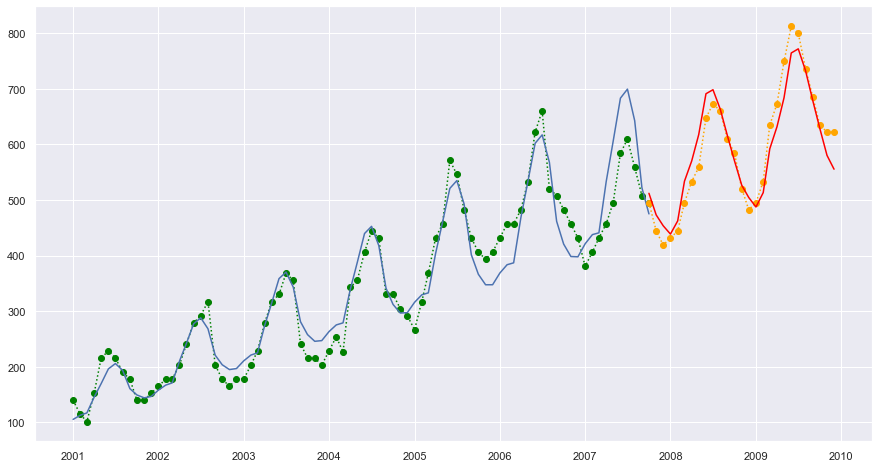

In [84]:

plt.figure(figsize=(15,8))
#train base
plt.plot(df_train2["Years"],df_train2["Sales"], "o:" ,color = 'green')
plt.plot(df_train2["Years"],df_train2["multiplicatif_model_prediction"])

#test base
plt.plot(df_test2["Years"],df_test2["Sales"], "o:",color='orange')
plt.plot(df_test2["Years"],df_test2["multiplicatif_model_prediction"], color='red')


plt.show()


Autocorrélation + stationnarisation

In [85]:
df_train3 = df_train.copy()
df_test3 = df_test.copy()

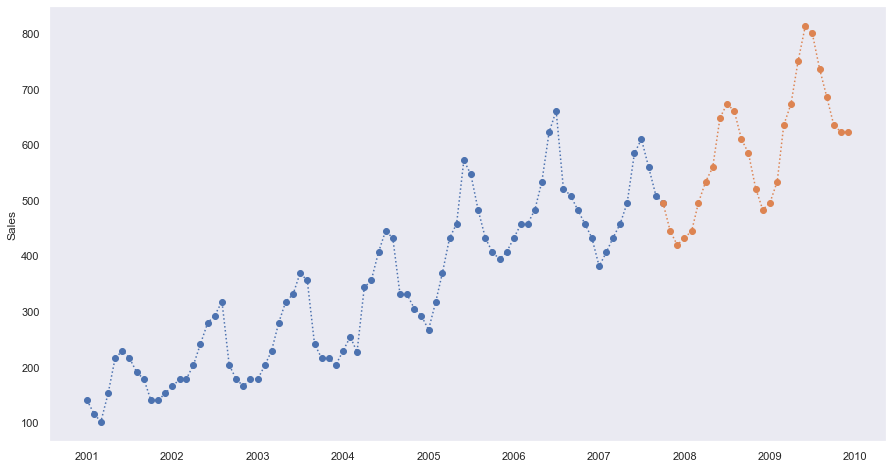

In [87]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
plt.ylabel("Sales")
plt.grid()
plt.show()

Text(0.5, 0, 'lags')

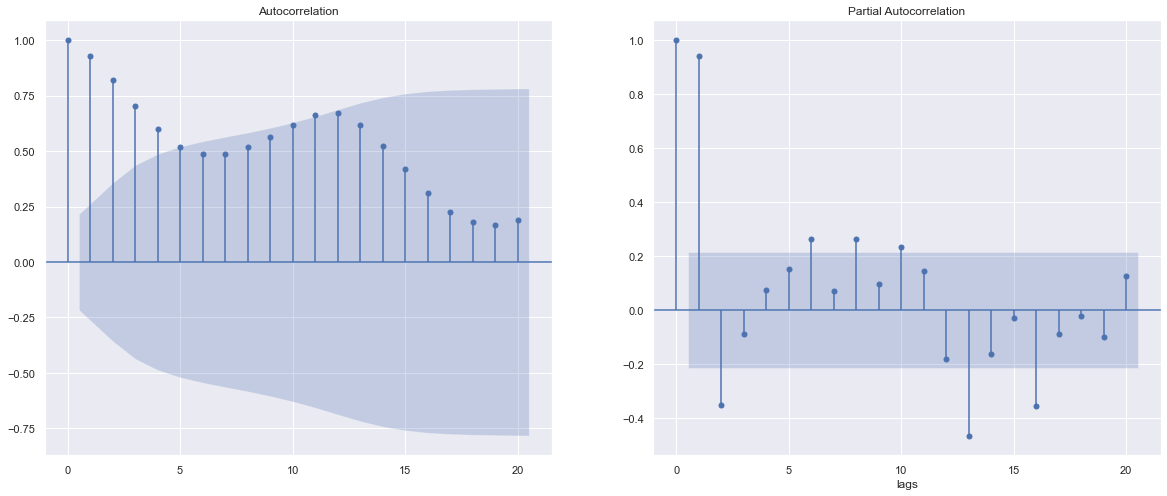

In [97]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(20,8))
autocor = plot_acf(df_train3["Sales"], ax=ax[0])
plt.xlabel('lags')
partial_autocor = plot_pacf(df_train3["Sales"], ax=ax[1])
plt.xlabel('lags')

In [98]:
difference = df_train3["Sales"].diff()
difference

0      NaN
1    -25.4
2    -12.7
3     50.8
4     63.5
      ... 
77    88.9
78    25.4
79   -50.8
80   -50.8
81   -12.7
Name: Sales, Length: 82, dtype: float64

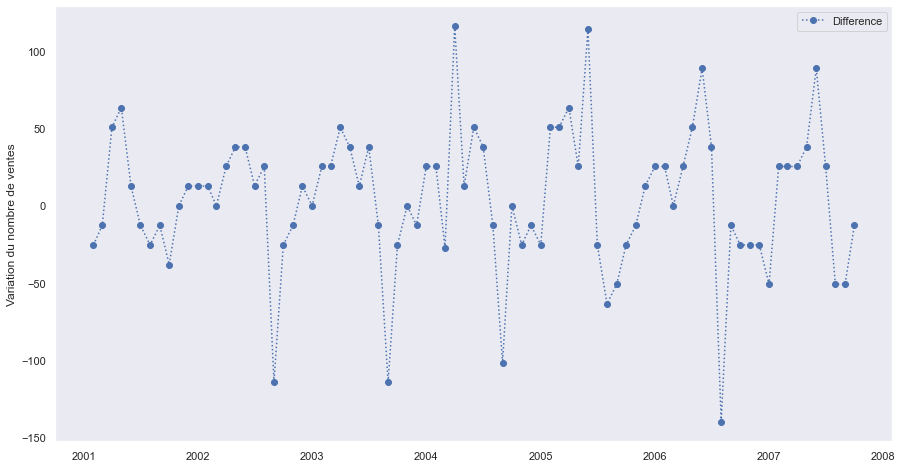

In [100]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], difference, "o:")
plt.legend(["Difference"])
plt.ylabel("Variation du nombre de ventes")
plt.grid()
plt.show()